In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from itertools import product

from copy import deepcopy

In [2]:
mrm_resonances = np.arange(0, 3200, 400)
crr_resonances = np.arange(0, 3200, 400)
laser_frequency = np.arange(0, 3200, 400)

cooling = -1.5
heating = 1

debug = 0

step_sweep = 200

no_iterations = int(1e4+1) # 10 thousand 1 iterations

no_mrm_internal_alignment_steps = 20
no_crr_internal_alignment_steps = 20

no_mrm_cycling_steps = 4
no_crr_cycling_steps = 6

no_mrms = 8
no_crrs = 8
no_laser_wavelengths = 8
no_resonances = 6
center_resonance = 3

mrm_fsr = np.arange(1780, 1825, no_resonances)
mrm_fabrication_variation = 200
mrm_optical_bandwidth = 60
crr_fsr = np.arange(1780, 1825, no_resonances)
crr_fabrication_variation = 200
crr_optical_bandwidth = 300

mrm_resonances_die_wafer_variation = np.zeros((no_mrms,no_resonances,no_iterations))
mrm_resonances_die_variation = np.zeros((no_mrms,no_resonances,no_iterations))
mrm_resonances_wafer_variation = np.zeros((no_mrms,no_resonances,no_iterations))
mrm_resonances_ideal = np.zeros((no_mrms,no_resonances,no_iterations))

mrm_die_variation = np.random.uniform(-mrm_fabrication_variation/2, mrm_fabrication_variation/2, size = (no_laser_wavelengths,no_iterations)) # Fabrication variation of the MRM resonances
mrm_wafer_variation = np.random.uniform(0, np.mean(mrm_fsr), no_iterations) # Start variation of the MRM resonances

for iter_no in range(no_iterations):
  for res_no in range(no_resonances):
    mrm_resonances_die_wafer_variation[:,res_no,iter_no] = np.arange(0, 3200, 400) + (res_no-center_resonance)*mrm_fsr + mrm_die_variation[:,iter_no] + mrm_wafer_variation[iter_no]
    mrm_resonances_die_variation[:,res_no,iter_no] = np.arange(0, 3200, 400) + (res_no-center_resonance)*mrm_fsr + mrm_die_variation[:,iter_no] 
    mrm_resonances_wafer_variation[:,res_no,iter_no] = np.arange(0, 3200, 400) + (res_no-center_resonance)*mrm_fsr + mrm_wafer_variation[iter_no]
    mrm_resonances_ideal[:,res_no,iter_no] = np.arange(0, 3200, 400) + (res_no-center_resonance)*mrm_fsr
    

crr_resonances_die_wafer_variation = np.zeros((no_crrs,no_resonances,no_iterations))
crr_resonances_die_variation = np.zeros((no_crrs,no_resonances,no_iterations))
crr_resonances_wafer_variation = np.zeros((no_crrs,no_resonances,no_iterations))
crr_resonances_ideal = np.zeros((no_crrs,no_resonances,no_iterations))

crr_die_variation = np.random.uniform(-crr_fabrication_variation/2, crr_fabrication_variation/2, size = (no_laser_wavelengths,no_iterations)) # Fabrication variation of the CRR resonances
crr_wafer_variation = np.random.uniform(0, np.mean(crr_fsr), no_iterations) # Start variation of the CRR resonances

for iter_no in range(no_iterations):
  for res_no in range(no_resonances):
    crr_resonances_die_wafer_variation[:,res_no,iter_no] = np.arange(0, 3200, 400) + (res_no-center_resonance)*crr_fsr + crr_die_variation[:,iter_no] + crr_wafer_variation[iter_no]
    crr_resonances_die_variation[:,res_no,iter_no] = np.arange(0, 3200, 400) + (res_no-center_resonance)*crr_fsr + crr_die_variation[:,iter_no] 
    crr_resonances_wafer_variation[:,res_no,iter_no] = np.arange(0, 3200, 400) + (res_no-center_resonance)*crr_fsr + crr_wafer_variation[iter_no]
    crr_resonances_ideal[:,res_no,iter_no] = np.arange(0, 3200, 400) + (res_no-center_resonance)*crr_fsr

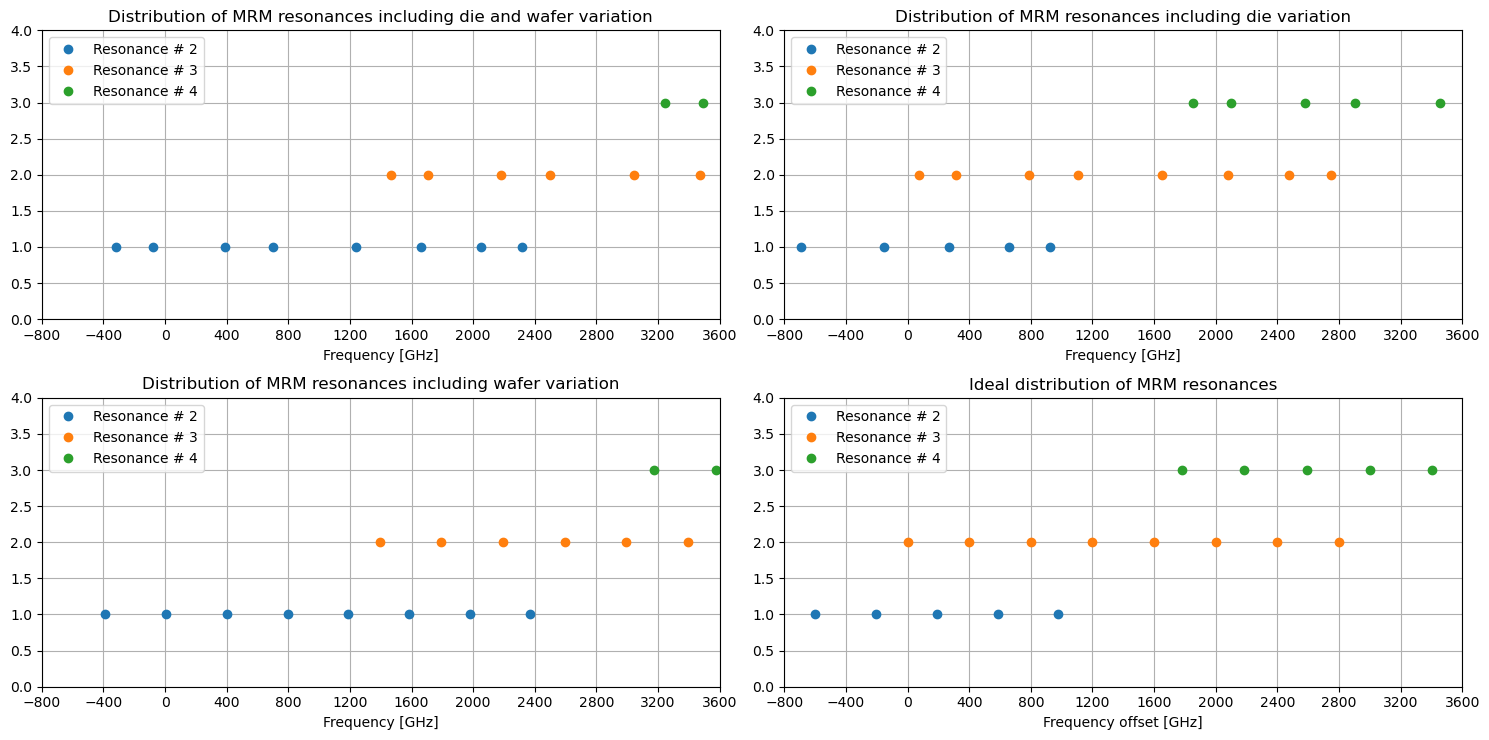

In [3]:
plt.figure(figsize=(15,7.5))
for res_no in [2,3,4]:  
  plt.subplot(2,2,1)
  plt.plot(mrm_resonances_die_wafer_variation[:,res_no,0], np.ones(no_mrms)*(res_no-1), 'o', label="Resonance # %d" % res_no)
  plt.legend()
  plt.grid(True)
  plt.xlim([-800, 3600])
  plt.xticks(np.arange(-800, 4000, 400))
  plt.ylim([0, 4.0])
  plt.title("Distribution of MRM resonances including die and wafer variation")
  plt.xlabel("Frequency [GHz]")
  plt.subplot(2,2,2)
  plt.plot(mrm_resonances_die_variation[:,res_no,0], np.ones(no_mrms)*(res_no-1), 'o', label="Resonance # %d" % res_no)
  plt.legend()
  plt.grid(True)
  plt.xlim([-800, 3600])
  plt.xticks(np.arange(-800, 4000, 400))
  plt.ylim([0, 4.0])
  plt.title("Distribution of MRM resonances including die variation")
  plt.xlabel("Frequency [GHz]")
  plt.subplot(2,2,3)
  plt.plot(mrm_resonances_wafer_variation[:,res_no,0], np.ones(no_mrms)*(res_no-1), 'o', label="Resonance # %d" % res_no)
  plt.legend()
  plt.grid(True)
  plt.xlim([-800, 3600])
  plt.xticks(np.arange(-800, 4000, 400))
  plt.ylim([0, 4.0])
  plt.title("Distribution of MRM resonances including wafer variation")
  plt.xlabel("Frequency [GHz]")
  plt.subplot(2,2,4)
  plt.plot(mrm_resonances_ideal[:,res_no,no_mrms], np.ones(8)*(res_no-1), 'o', label="Resonance # %d" % res_no)
  plt.legend()
  plt.grid(True)
  plt.xlim([-800, 3600])
  plt.xticks(np.arange(-800, 4000, 400))
  plt.ylim([0, 4.0])
  plt.xlabel("Frequency offset [GHz]")
  plt.title("Ideal distribution of MRM resonances")
plt.tight_layout()

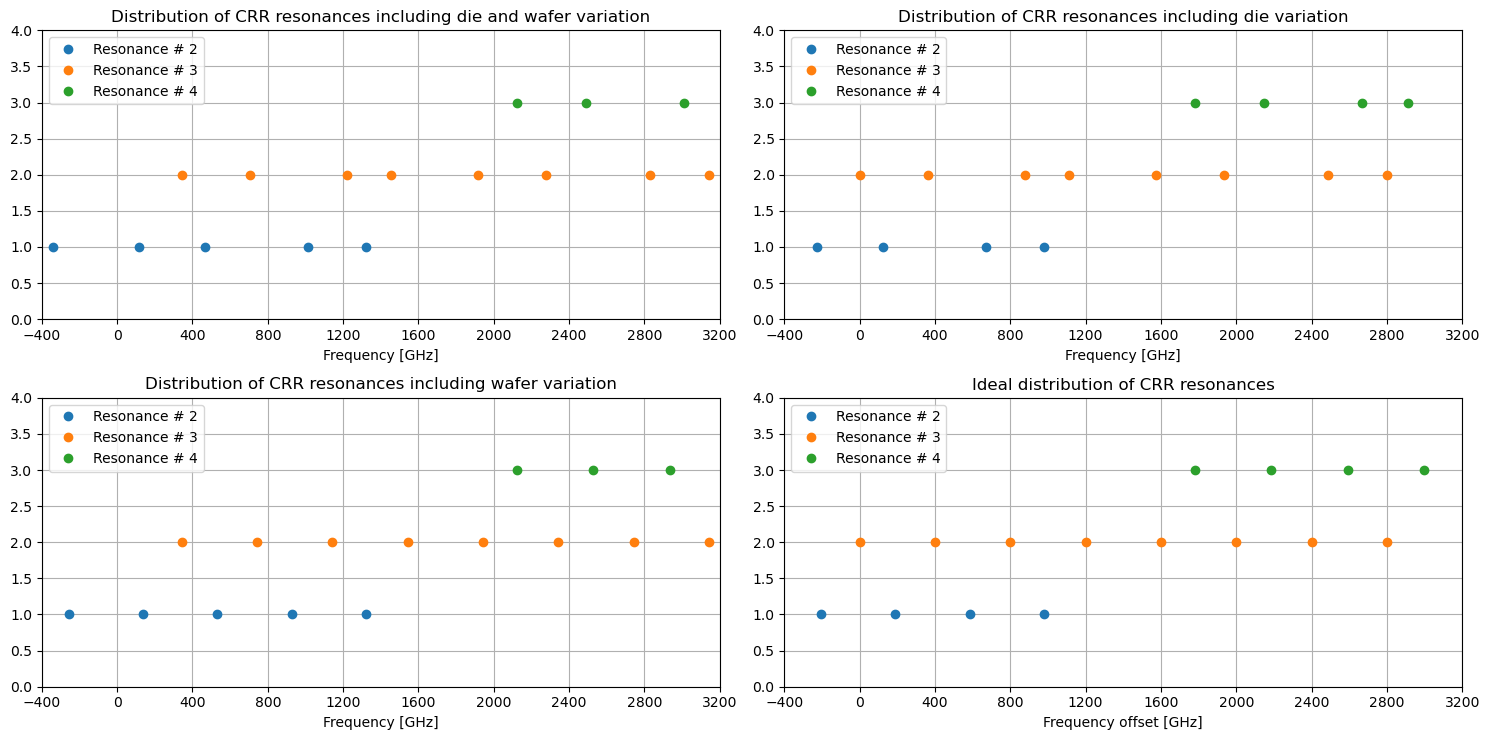

In [4]:
plt.figure(figsize=(15,7.5))
for res_no in [2,3,4]:  
  plt.subplot(2,2,1)
  plt.plot(crr_resonances_die_wafer_variation[:,res_no,0], np.ones(no_mrms)*(res_no-1), 'o', label="Resonance # %d" % res_no)
  plt.legend()
  plt.grid(True)
  plt.xlim([-400, 3200])
  plt.xticks(np.arange(-400, 3600, 400))
  plt.ylim([0, 4.0])
  plt.title("Distribution of CRR resonances including die and wafer variation")
  plt.xlabel("Frequency [GHz]")
  plt.subplot(2,2,2)
  plt.plot(crr_resonances_die_variation[:,res_no,0], np.ones(no_mrms)*(res_no-1), 'o', label="Resonance # %d" % res_no)
  plt.legend()
  plt.grid(True)
  plt.xlim([-400, 3200])
  plt.xticks(np.arange(-400, 3600, 400))
  plt.ylim([0, 4.0])
  plt.title("Distribution of CRR resonances including die variation")
  plt.xlabel("Frequency [GHz]")
  plt.subplot(2,2,3)
  plt.plot(crr_resonances_wafer_variation[:,res_no,0], np.ones(no_mrms)*(res_no-1), 'o', label="Resonance # %d" % res_no)
  plt.legend()
  plt.grid(True)
  plt.xlim([-400, 3200])
  plt.xticks(np.arange(-400, 3600, 400))
  plt.ylim([0, 4.0])
  plt.title("Distribution of CRR resonances including wafer variation")
  plt.xlabel("Frequency [GHz]")
  plt.subplot(2,2,4)
  plt.plot(crr_resonances_ideal[:,res_no,no_mrms], np.ones(8)*(res_no-1), 'o', label="Resonance # %d" % res_no)
  plt.legend()
  plt.grid(True)
  plt.xlim([-400, 3200])
  plt.xticks(np.arange(-400, 3600, 400))
  plt.ylim([0, 4.0])
  plt.xlabel("Frequency offset [GHz]")
  plt.title("Ideal distribution of CRR resonances")
plt.tight_layout()

## MRM wavelength sequential assignment

In [5]:
def order_check(device_resonances_iter):
  device_assigned = []
  laser_assigned = []
  step_assigned = []
  resonance_assigned = []
  device_resonances_copy = deepcopy(device_resonances_iter)
  for device_no in range(no_mrms): # sweeping for mrm order
    for step_no in [-1, 1]:
        for laser_no in range(no_laser_wavelengths):
              confirmed = False
              resonances_location = device_resonances_copy[device_no,:] - laser_frequency[laser_no] + heating * step_no * step_sweep 
              if debug:
                print("device_no: ", device_no, ", step_no: ", step_no, ", laser_no: ", laser_no, ", laser_frequency:", laser_frequency[laser_no],", device_resonance_iter:", device_resonances_copy[device_no,:], ", resonances_location: ", resonances_location, ", heating/cooling:", heating * step_no * step_sweep)
              if step_no == -1:
                for res_no in range(no_resonances):
                  if ((resonances_location[res_no]) <= mrm_optical_bandwidth/2) and ((resonances_location[res_no]) >= - step_sweep - mrm_optical_bandwidth/2):
                    if debug:
                      print("Negative Step Entered")
                    confirmed = True
              else:
                for res_no in range(no_resonances):
                  if ((resonances_location[res_no]  >= -mrm_optical_bandwidth/2) and ((resonances_location[res_no]) <= step_sweep + mrm_optical_bandwidth/2)):
                    if debug:
                      print(" Positive Step Entered")
                    confirmed = True
              if confirmed:
                device_assigned.append(device_no)
                laser_assigned.append(laser_no)
                step_assigned.append(step_no)
                resonance_assigned.append(np.argmin(resonances_location * step_no))
                break
  return np.array(device_assigned), np.array(laser_assigned), np.array(step_assigned), np.array(resonance_assigned)

def cycling(device_resonance_iter, additional_heating):
  device_resonance_cycling = deepcopy(device_resonance_iter)
  for device_no in range(no_mrms):
    device_resonance_cycling[device_no,:] = device_resonance_iter[device_no,:] + additional_heating * step_sweep * 2
  return device_resonance_cycling

def sequential_alignment(device_resonance_iter, additional_heating):
  device_resonance_sequential = deepcopy(device_resonance_iter)
  for device_no in range(no_mrms):
    device_resonance_sequential[device_no,:] = device_resonance_iter[device_no,:] + additional_heating * step_sweep * 2
    
  device_assigned = []
  laser_assigned = []
  heat_assigned = []
  resonance_assigned = []
  for device_no in range(no_mrms):
  # for device_no in range(no_mrms):
    for laser_no in range(no_laser_wavelengths):
      if laser_no not in laser_assigned:
        confirmed = False
        resonances_location = device_resonance_sequential[device_no,:] - laser_frequency[laser_no] + 2 * step_sweep 
        if debug:
          print("device_no: ", device_no, ", laser_no: ", laser_no, ", laser_frequency:", laser_frequency[laser_no],", device_resonance_iter:", device_resonance_sequential[device_no,:], ", resonances_location: ", resonances_location, ", heating/cooling:", heating * step_sweep)
        for res_no in range(no_resonances):
          if ((resonances_location[res_no]  >= -mrm_optical_bandwidth/2) and ((resonances_location[res_no]) <= step_sweep*2 + mrm_optical_bandwidth/2)):
            if debug:
              print(" Positive Step Entered")
            heat = resonances_location[res_no]/2/step_sweep
            confirmed = True
        if confirmed:
          device_assigned.append(device_no)
          laser_assigned.append(laser_no)
          heat_assigned.append(heat)
          resonance_assigned.append(res_no)
          break
  return device_resonance_sequential, np.array(device_assigned), np.array(laser_assigned), np.array(heat_assigned), np.array(resonance_assigned)

mrm_assigned:  [0 0 1 1 2 3 3 4 4 5 5 6 6 7]
laser_assigned:  [1 6 2 7 3 0 0 1 1 6 2 7 3 4]
step_assigned:  [-1  1 -1  1 -1 -1  1 -1  1 -1  1 -1  1  1]
mrm_resonances_iter:  [-1269.84365102  -924.35772811  -517.56517202   -12.64025966
   382.33517236   646.96611119  1169.29325432  1471.91194912]
mrm_resonances_iter:  [ 510.15634898  861.64227189 1274.43482798 1785.35974034 2186.33517236
 2456.96611119 2985.29325432 3293.91194912]
laser_frequency:  [   0  400  800 1200 1600 2000 2400 2800]
Counts of MRMs vs Laser:  [2 2 1 2 2 2 2 1]
count_idx:  [(5, 3, 7, 1)]


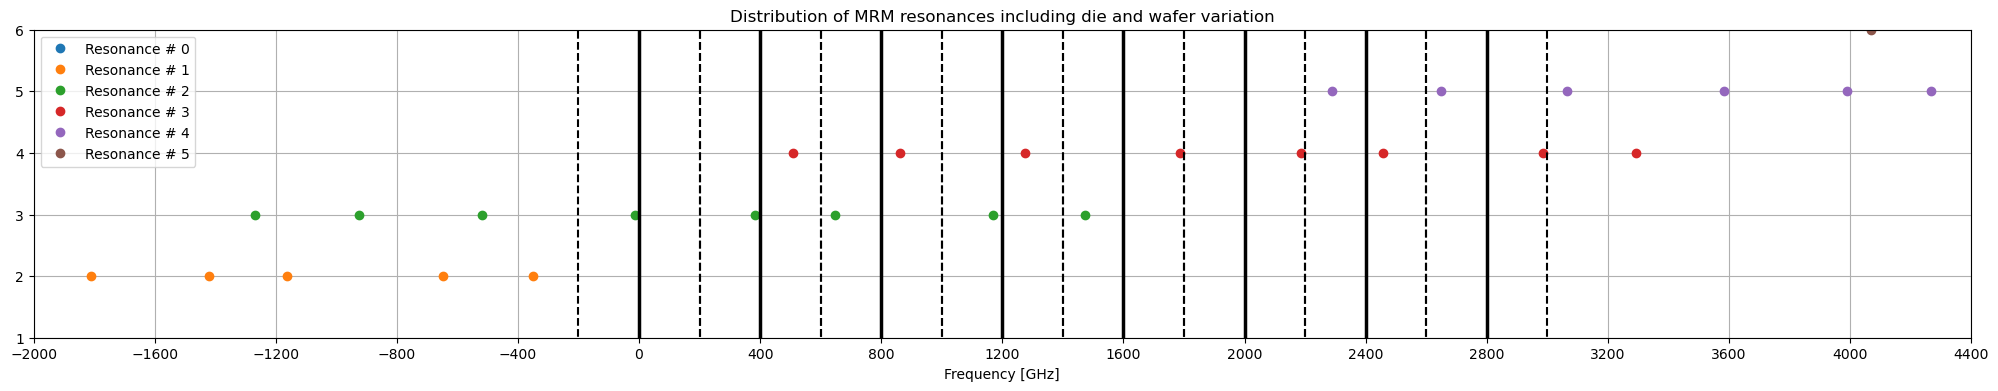

In [6]:
debug = 0
iter_no = 5

mrm_resonances_iter = mrm_resonances_die_wafer_variation[:,:,iter_no]
mrm_assigned, laser_assigned, step_assigned, resonance_assigned = order_check(mrm_resonances_iter)#, additional_heating=0, laser_frequency=laser_frequency)

print("mrm_assigned: ", mrm_assigned)
print("laser_assigned: ", laser_assigned)
print("step_assigned: ", step_assigned)
print("mrm_resonances_iter: ", mrm_resonances_iter[:,2])
print("mrm_resonances_iter: ", mrm_resonances_iter[:,3])
print("laser_frequency: ", laser_frequency)

counts = np.bincount(mrm_assigned)
print("Counts of MRMs vs Laser: ", counts)

count_idx = []
if np.min(counts) == 2:
  count_idx.append((iter_no, -0.5, 0, 2))
else:
  for idx in range(no_mrms):
    if counts[no_mrms - idx - 1] == 1:
      if no_mrms - idx - 1 < 4:
        count_idx.append((iter_no, no_mrms - idx - 1, no_mrms - idx - 1, 1))
      else:
        count_idx.append((iter_no, no_mrms - idx - 1 - 4,no_mrms - idx - 1, 1))
        break

print("count_idx: ", count_idx)

plt.figure(figsize=(25,4))
for res_no in range(no_resonances):
  plt.plot(mrm_resonances_iter[:,res_no], np.ones(no_laser_wavelengths)*(res_no+1), 'o', label="Resonance # %d" % res_no)
  plt.legend()
  plt.grid(True)
  plt.xlim([-2000, 4400])
  plt.xticks(np.arange(-2000, 4800, 400))
  plt.title("Distribution of MRM resonances including die and wafer variation")
  plt.xlabel("Frequency [GHz]")
for laser_no in range(no_laser_wavelengths):
  plt.plot(laser_frequency[laser_no] * np.ones(11), np.linspace(0,6,11), 'k', linewidth=2.5)
  plt.plot(laser_frequency[laser_no] * np.ones(11)+200, np.linspace(0,6,11), 'k', linewidth=1.5, linestyle='dashed')
  plt.plot(laser_frequency[laser_no] * np.ones(11)-200, np.linspace(0,6,11), 'k', linewidth=1.5, linestyle='dashed')
plt.ylim([1,6])
plt.legend()
plt.show()

In [7]:
count_idx = []

for iter_no in range(no_iterations):
  mrm_resonances_iter = mrm_resonances_die_wafer_variation[:,:,iter_no]
  mrm_assigned, laser_assigned, step_assigned, resonance_assigned = order_check(mrm_resonances_iter)#, additional_heating=0, laser_frequency=laser_frequency)
  count = np.bincount(mrm_assigned)
  if np.min(count) == 2:
    count_idx.append((iter_no, -0.5, -1, 2))
  else:
    for idx in range(no_mrms):
      if count[no_mrms - idx - 1] == 1:
        if no_mrms - idx - 1 < 3:
          count_idx.append((iter_no, no_mrms - idx - 1 + 0.5, no_mrms - idx - 1, 1))
        if (no_mrms - idx - 1 == 3):
            count_idx.append((iter_no, no_mrms - idx - 5 + 0.5, no_mrms - idx - 1, 1))
        if (no_mrms - idx - 1 == 4):
          count_idx.append((iter_no, no_mrms - idx - 5  + 0.5, no_mrms - idx - 1, 1))
        if no_mrms - idx - 1 >4:
          count_idx.append((iter_no, no_mrms - idx - 1 - 4,no_mrms - idx - 1, 1))
        break

count_idx = np.array(count_idx)
count_idx.shape

(10001, 4)

In [8]:
iter_no

10000

In [9]:
mrm_resonances_iter = mrm_resonances_die_wafer_variation[:,:,iter_no]
mrm_assigned, laser_assigned, step_assigned, resonance_assigned = order_check(mrm_resonances_iter)#, additional_heating=0, laser_frequency=laser_frequency)
mrm_assigned

array([0, 1, 1, 2, 2, 3, 3, 4, 5, 5, 6, 6, 7, 7])

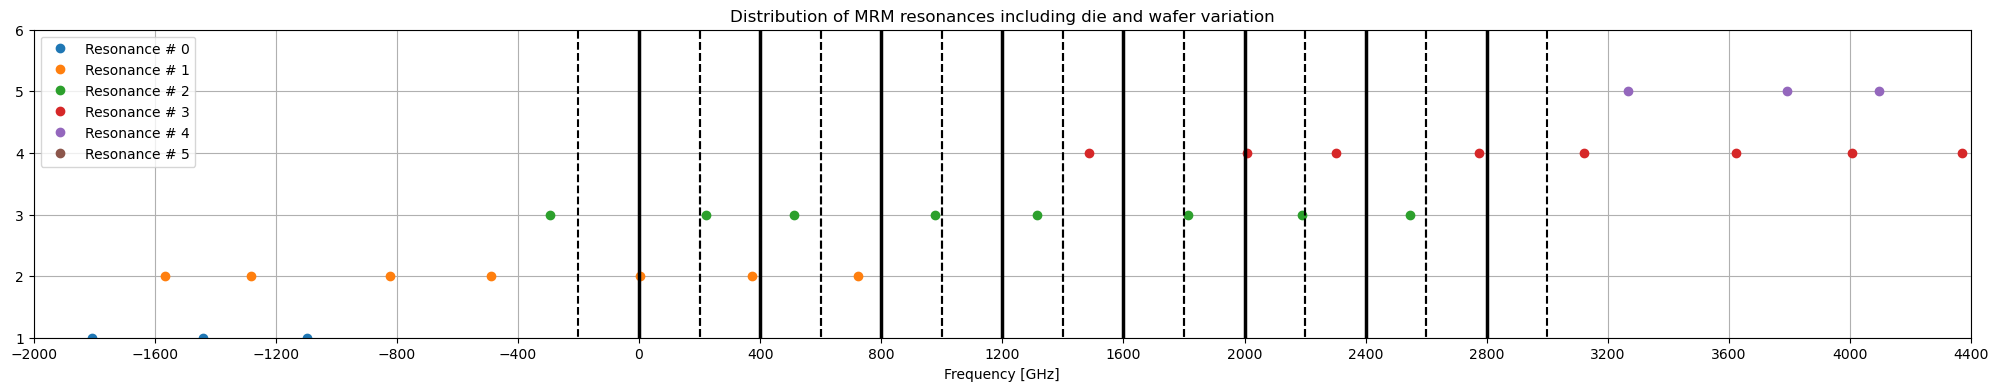

In [10]:
plt.figure(figsize=(25,4))
for res_no in range(no_resonances):
  plt.plot(mrm_resonances_iter[:,res_no], np.ones(no_laser_wavelengths)*(res_no+1), 'o', label="Resonance # %d" % res_no)
  plt.legend()
  plt.grid(True)
  plt.xlim([-2000, 4400])
  plt.xticks(np.arange(-2000, 4800, 400))
  plt.title("Distribution of MRM resonances including die and wafer variation")
  plt.xlabel("Frequency [GHz]")
for laser_no in range(no_laser_wavelengths):
  plt.plot(laser_frequency[laser_no] * np.ones(11), np.linspace(0,6,11), 'k', linewidth=2.5)
  plt.plot(laser_frequency[laser_no] * np.ones(11)+200, np.linspace(0,6,11), 'k', linewidth=1.5, linestyle='dashed')
  plt.plot(laser_frequency[laser_no] * np.ones(11)-200, np.linspace(0,6,11), 'k', linewidth=1.5, linestyle='dashed')
plt.ylim([1,6])
plt.legend()
plt.show()

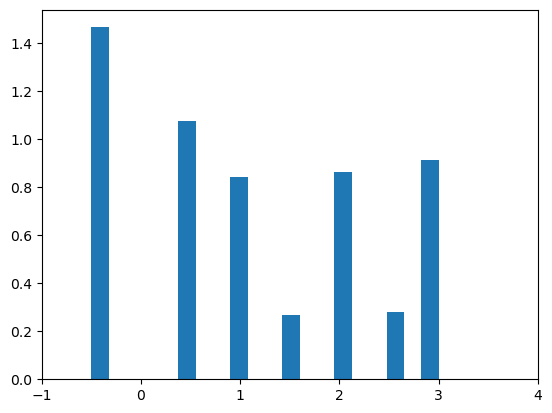

In [11]:
plt.hist(count_idx[:,1].flatten(), density = True, rwidth=1.0, bins = 20)
plt.xlim([-1, 4])
plt.xticks(np.arange(-1, 5, 1))
plt.show()

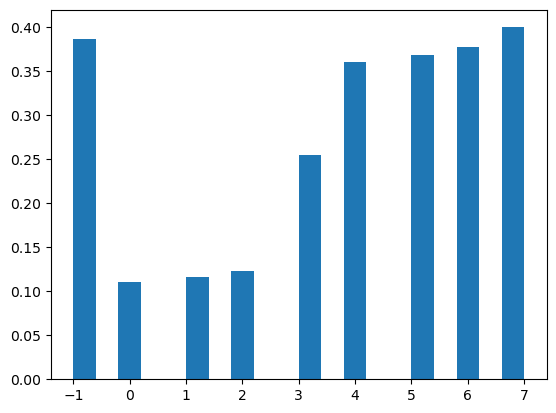

In [12]:
plt.hist(count_idx[:,2].flatten(), density = True, rwidth=1.0, bins = 20)
plt.show()

In [13]:
for iter_no in range(no_iterations):
    if (count_idx[iter_no,2] >=3) and (count_idx[iter_no,2] <4):
        break

print("iter_no: ", iter_no)
print("count_idx: ", count_idx[iter_no])

iter_no:  4
count_idx:  [ 4.  -0.5  3.   1. ]


mrm_assigned:  [0 0 1 1 2 2 3 4 4 5 5 6 6 7 7]
laser_assigned:  [5 1 6 2 7 3 3 0 5 1 6 2 7 3 3]
step_assigned:  [-1  1 -1  1 -1  1 -1 -1  1 -1  1 -1  1 -1  1]
mrm_resonances_iter:  [-1542.15646287 -1120.76121071  -671.89299473  -433.64225476
    34.07821476   495.93654462   839.70271371  1202.99683266]
mrm_resonances_iter:  [ 237.84353713  665.23878929 1120.10700527 1364.35774524 1838.07821476
 2305.93654462 2655.70271371 3024.99683266]
laser_frequency:  [   0  400  800 1200 1600 2000 2400 2800]
count_idx_iter: [ 4.  -0.5  3.   1. ]



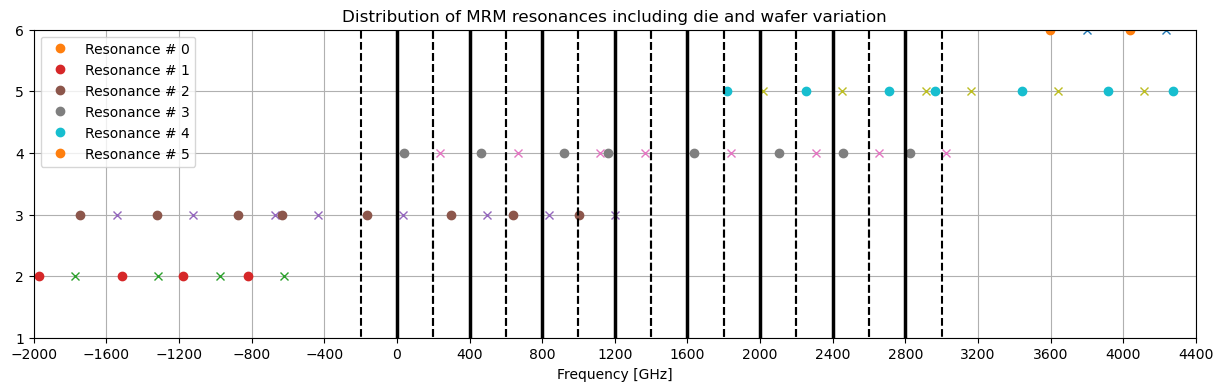

device_assigned: [0 1 2 4 5 6]
laser_assigned: [1 2 3 0 6 7]
heat_assigned: [0.09460884 0.16309697 0.30026751 0.58519554 0.26484136 0.13925678]
resonance_assigned: [5 5 5 5 5 5]


In [14]:
iter_no = iter_no

mrm_resonances_iter = mrm_resonances_die_wafer_variation[:,:,iter_no]
mrm_assigned, laser_assigned, step_assigned, resonance_assigned = order_check(mrm_resonances_iter)#, additional_heating=0, laser_frequency=laser_frequency)

print("mrm_assigned: ", mrm_assigned)
print("laser_assigned: ", laser_assigned)
print("step_assigned: ", step_assigned)
print("mrm_resonances_iter: ", mrm_resonances_iter[:,2])
print("mrm_resonances_iter: ", mrm_resonances_iter[:,3])
print("laser_frequency: ", laser_frequency)

count_idx_iter = count_idx[iter_no, :]

device_resonance_sequential, device_assigned, laser_assigned, heat_assigned, resonance_assigned = sequential_alignment(mrm_resonances_iter, count_idx_iter[1])
print("count_idx_iter:", count_idx_iter)
print()

plt.figure(figsize=(15,4))
for res_no in range(no_resonances):
  plt.plot(mrm_resonances_iter[:,res_no], np.ones(no_laser_wavelengths)*(res_no+1), 'x')#, label="Resonance # %d" % res_no)
  plt.plot(device_resonance_sequential[:,res_no], np.ones(no_laser_wavelengths)*(res_no+1), 'o', label="Resonance # %d" % res_no)
  plt.legend()
  plt.grid(True)
  plt.xlim([-2000, 4400])
  plt.xticks(np.arange(-2000, 4800, 400))
  plt.title("Distribution of MRM resonances including die and wafer variation")
  plt.xlabel("Frequency [GHz]")
for laser_no in range(no_laser_wavelengths):
  plt.plot(laser_frequency[laser_no] * np.ones(11), np.linspace(0,6,11), 'k', linewidth=2.5)
  plt.plot(laser_frequency[laser_no] * np.ones(11)+200, np.linspace(0,6,11), 'k', linewidth=1.5, linestyle='dashed')
  plt.plot(laser_frequency[laser_no] * np.ones(11)-200, np.linspace(0,6,11), 'k', linewidth=1.5, linestyle='dashed')
plt.ylim([1,6])
plt.legend()
plt.show()

print("device_assigned:", device_assigned)
print("laser_assigned:", laser_assigned)
print("heat_assigned:", heat_assigned)
print("resonance_assigned:", resonance_assigned)

In [15]:
mrm_sequential_success = []
for iter_no in range(no_iterations):
  mrm_resonances_iter = mrm_resonances_die_wafer_variation[:,:,iter_no]
  mrm_assigned, laser_assigned, step_assigned, resonance_assigned = order_check(mrm_resonances_iter)#, additional_heating=0, laser_frequency=laser_frequency)
      
  device_resonance_sequential, device_assigned, laser_assigned, heat_assigned, resonance_assigned = sequential_alignment(mrm_resonances_iter, count_idx[iter_no][1])
  if np.setdiff1d(np.arange(8), device_assigned).size == 0:
    mrm_sequential_success.append(device_resonance_sequential)
  else:
    print("iter_no: ", iter_no)
    print("device_assigned: ", device_assigned)
    print("laser_assigned: ", laser_assigned)
    print("\n")
  

iter_no:  4
device_assigned:  [0 1 2 4 5 6]
laser_assigned:  [1 2 3 0 6 7]


iter_no:  6
device_assigned:  [0 1 2 3 4 5 6]
laser_assigned:  [1 6 3 4 0 5 2]


iter_no:  17
device_assigned:  [0 1 2 3 4 5 6]
laser_assigned:  [1 2 7 3 0 5 6]


iter_no:  19
device_assigned:  [0 1 2 3 4 5 7]
laser_assigned:  [1 2 7 4 0 6 3]


iter_no:  23
device_assigned:  [0 1 2 3 4 6]
laser_assigned:  [0 1 3 4 5 2]


iter_no:  27
device_assigned:  [0 1 2 3 4 5 6]
laser_assigned:  [1 2 3 4 0 6 7]


iter_no:  30
device_assigned:  [0 1 2 4 5 6 7]
laser_assigned:  [0 1 3 4 5 2 7]


iter_no:  31
device_assigned:  [0 1 2 3 4 5 6]
laser_assigned:  [1 2 3 0 5 6 7]


iter_no:  36
device_assigned:  [0 1 2 4 5 6]
laser_assigned:  [1 2 3 0 6 7]


iter_no:  40
device_assigned:  [0 1 2 3 4 5]
laser_assigned:  [0 1 6 2 4 5]


iter_no:  41
device_assigned:  [0 1 2 3 4 5 6]
laser_assigned:  [1 6 2 3 0 5 7]


iter_no:  42
device_assigned:  [0 1 2 3 4 5]
laser_assigned:  [1 2 7 3 0 6]


iter_no:  44
device_assigned:  [0 1 2 

In [16]:
len(mrm_sequential_success)

7010

mrm_assigned:  [0 0 1 2 2 3 3 4 4 5 5 6 6 7 7]
laser_assigned:  [7 3 4 4 0 1 6 2 7 3 3 4 4 5 1]
step_assigned:  [-1  1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1]
mrm_resonances_iter:  [-736.63627774 -344.1159085   -47.08153657  478.51363927  913.43483281
 1224.87224229 1572.14275352 2115.69846479]
mrm_resonances_iter:  [1043.36372226 1441.8840915  1744.91846343 2276.51363927 2717.43483281
 3034.87224229 3388.14275352 3937.69846479]
laser_frequency:  [   0  400  800 1200 1600 2000 2400 2800]
count_idx_iter: [1.  1.5 1.  1. ]
mrm_resonances_sequential_iter:  [-136.63627774  255.8840915   552.91846343 1078.51363927 1513.43483281
 1824.87224229 2172.14275352 2715.69846479]
mrm_resonances_sequential_iter:  [1643.36372226 2041.8840915  2344.91846343 2876.51363927 3317.43483281
 3634.87224229 3988.14275352 4537.69846479]


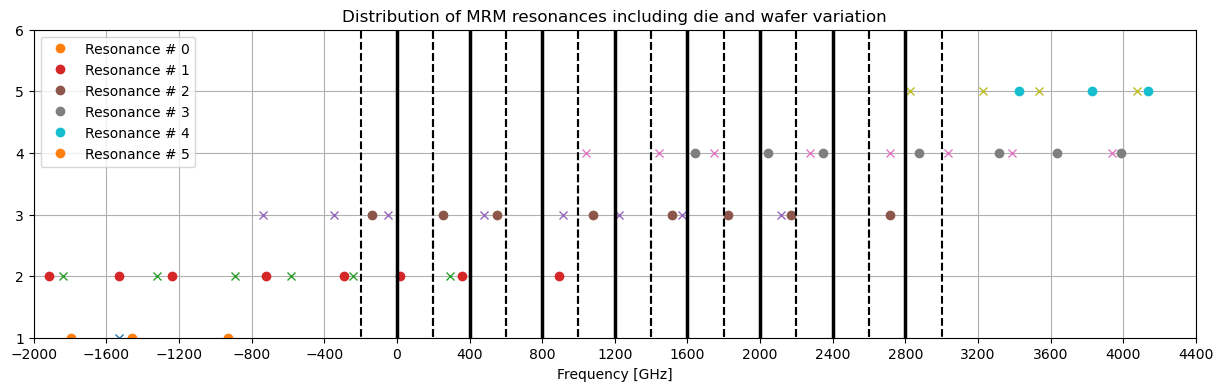

device_assigned: [0 1 2 3 4 5 6 7]
laser_assigned: [0 1 2 3 4 5 6 7]
heat_assigned: [0.65840931 0.63971023 0.38229616 0.6962841  0.78358708 0.56218061
 0.43035688 0.78924616]
resonance_assigned: [5 5 5 5 5 5 5 5]


In [17]:
iter_no = 1

mrm_resonances_iter = mrm_resonances_die_wafer_variation[:,:,iter_no]
mrm_assigned, laser_assigned, step_assigned, resonance_assigned = order_check(mrm_resonances_iter)#, additional_heating=0, laser_frequency=laser_frequency)

print("mrm_assigned: ", mrm_assigned)
print("laser_assigned: ", laser_assigned)
print("step_assigned: ", step_assigned)
print("mrm_resonances_iter: ", mrm_resonances_iter[:,2])
print("mrm_resonances_iter: ", mrm_resonances_iter[:,3])
print("laser_frequency: ", laser_frequency)

count_idx_iter = count_idx[iter_no, :]

device_resonance_sequential, device_assigned, laser_assigned, heat_assigned, resonance_assigned = sequential_alignment(mrm_resonances_iter, count_idx_iter[1])
print("count_idx_iter:", count_idx_iter)
print("mrm_resonances_sequential_iter: ", device_resonance_sequential[:,2])
print("mrm_resonances_sequential_iter: ", device_resonance_sequential[:,3])

plt.figure(figsize=(15,4))
for res_no in range(no_resonances):
  plt.plot(mrm_resonances_iter[:,res_no], np.ones(no_laser_wavelengths)*(res_no+1), 'x')#, label="Resonance # %d" % res_no)
  plt.plot(device_resonance_sequential[:,res_no], np.ones(no_laser_wavelengths)*(res_no+1), 'o', label="Resonance # %d" % res_no)
  plt.legend()
  plt.grid(True)
  plt.xlim([-2000, 4400])
  plt.xticks(np.arange(-2000, 4800, 400))
  plt.title("Distribution of MRM resonances including die and wafer variation")
  plt.xlabel("Frequency [GHz]")
for laser_no in range(no_laser_wavelengths):
  plt.plot(laser_frequency[laser_no] * np.ones(11), np.linspace(0,6,11), 'k', linewidth=2.5)
  plt.plot(laser_frequency[laser_no] * np.ones(11)+200, np.linspace(0,6,11), 'k', linewidth=1.5, linestyle='dashed')
  plt.plot(laser_frequency[laser_no] * np.ones(11)-200, np.linspace(0,6,11), 'k', linewidth=1.5, linestyle='dashed')
plt.ylim([1,6])
plt.legend()
plt.show()

print("device_assigned:", device_assigned)
print("laser_assigned:", laser_assigned)
print("heat_assigned:", heat_assigned)
print("resonance_assigned:", resonance_assigned)

In [18]:
for i in range(1, 10):
  print(10-i)

9
8
7
6
5
4
3
2
1
